<a href="https://colab.research.google.com/github/japnit01/Face-detection-and-recognition/blob/main/Experimental%20log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midas Summer Internship
Submitted by:- Japnit Singh

In [ ]:
Precprocessing of Dataset

Appending the images and labels to x_train and y_train by iterating over all the images
In the Datagenerator images augmented by random rotating and random shearing to increae the accuracy 
and the y_train elements(label of the dataset) were converted into one hot encoding

Selection of model

As Resnet gives good results on classification problem I tried to make model resembling like resnet

In [ ]:
def CNN(input_shape):
  X_input = Input(input_shape)
  X = Conv2D(64,(3,3), padding="valid")(X_input)
  X = BatchNormalization(axis = 1)(X)
  X = Activation('relu')(X)

  X = MaxPool2D(pool_size=(2, 2), padding='valid')(X)
  
  X = Flatten()(X)
  X = Dense(256,activation="softmax")(X)
  X = Dense(62,activation="softmax")(X)
  model = Model(inputs = X_input, outputs = X)
  return model

In [ ]:
def block(X):
  X_shortcut = X
  X = Conv2D(64,(3,3), padding="valid")(X)
  X = BatchNormalization(axis = 1)(X)
  X = Activation('relu')(X)

  X = Conv2D(64,(3,3), padding="valid")(X)
  X = BatchNormalization(axis = 1)(X)

  X = Conv2D(64,(3,3), padding="valid")(X)
  X = BatchNormalization(axis = 1)(X)
  
  X_shortcut = Conv2D(64,(3,3), padding="valid")(X_shortcut)
  X_shortcut = Resizing(X.shape[1],X.shape[2])(X_shortcut)
  X = Add()([X,X_shortcut])
  return X

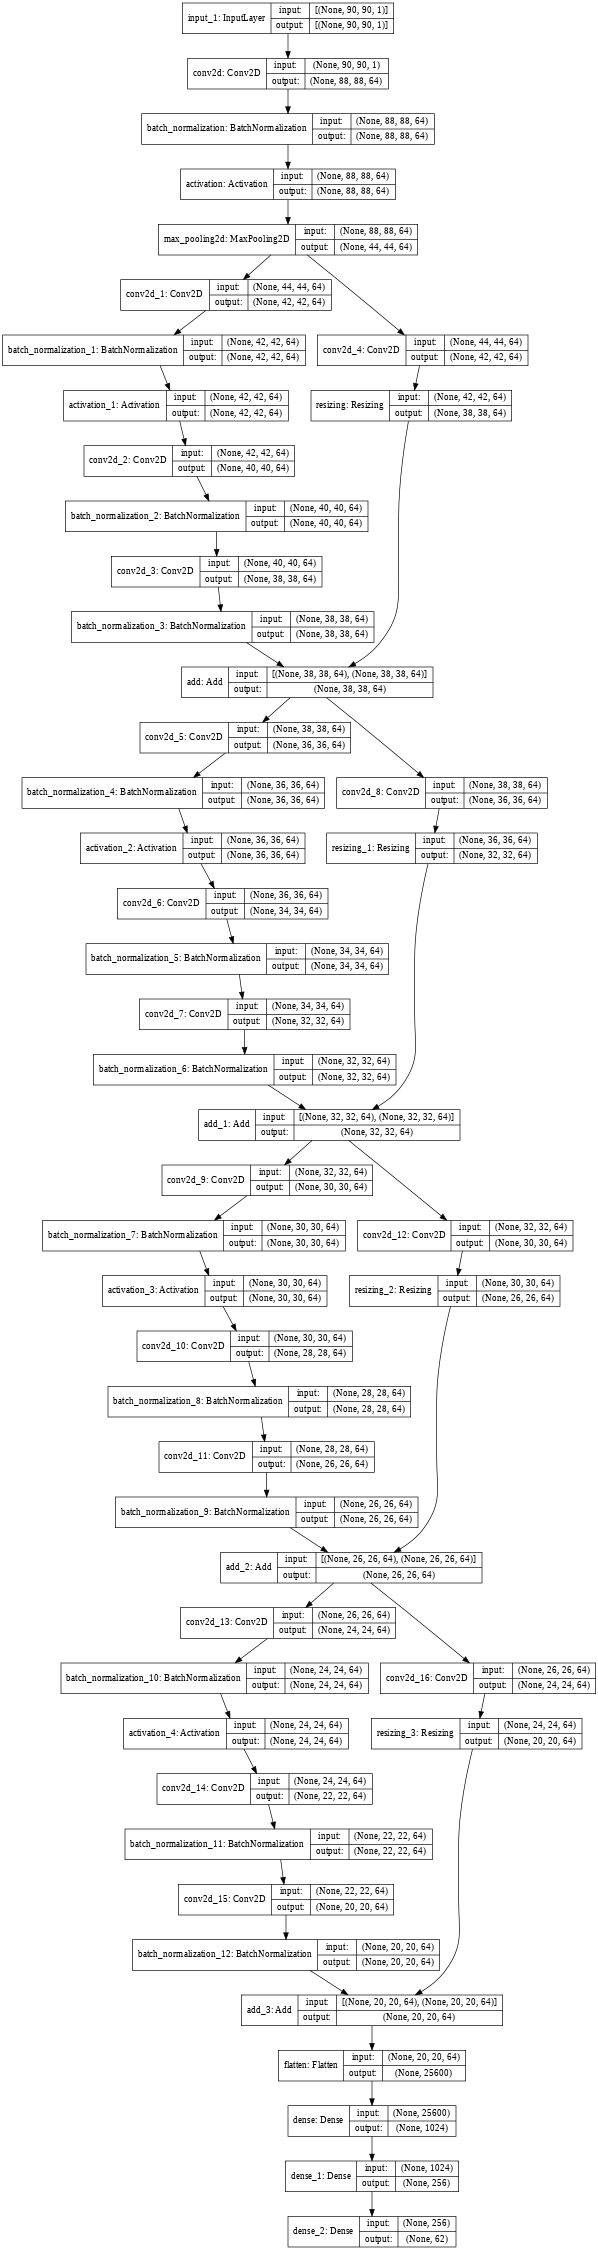

I tried adding more maxpooling2D and conv2d layer and also tried adding dropout remove overfitting of model that helped in achieving a validation accuracy of 52%

Increasing the layers helped till an extent in improving the accuracy but due to large no. of parameters it got overfitted

In [ ]:
Conv2D layer is used as the filter used on 2D plane contains a weight that is shared across all filters used across the same plane.

MaxPooling2D reduces the number of parameters to learn and the amount of computation
Using these aspects I built basic cnn model

Training model for few epochs on different input size and batch size of 16 and 32 the best accuracy was on input_shape = (28,28,1) and batch size of 32
reducing the size and increasing the batch size helped in increasing accuracy of the model

It helped in achieving a validation accuracy of around 63% and training accuracy of 74 
%



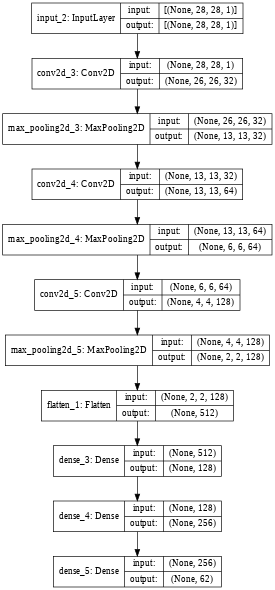

After training on this model for 40 epochs 69 steps per epoch and at a batch size of 32 the graph of epoch_accuracy and epoch_loss


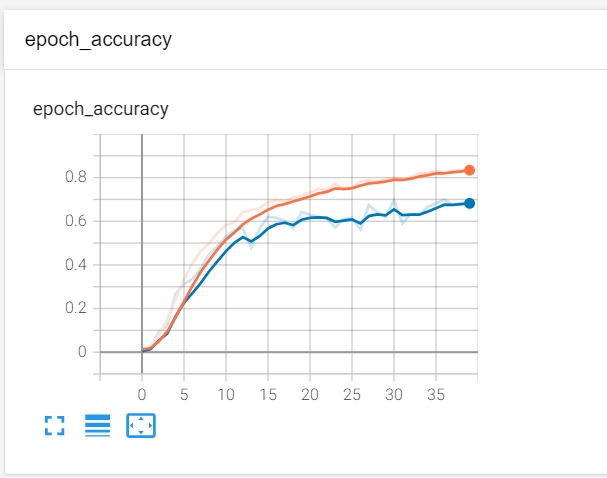



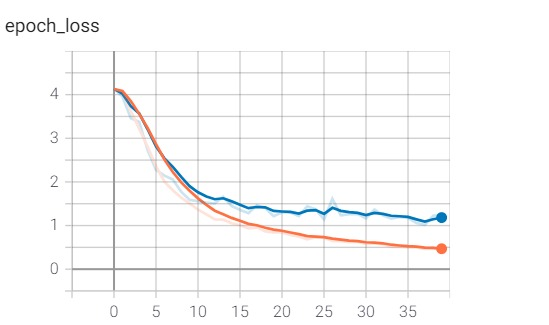

In [ ]:
To remove over fitting I trained 2 models one with dropout layer and added Regularization to other models

Then I trained the Dropout layer for the best accuracy and value came out be 0.2

Droptout Model

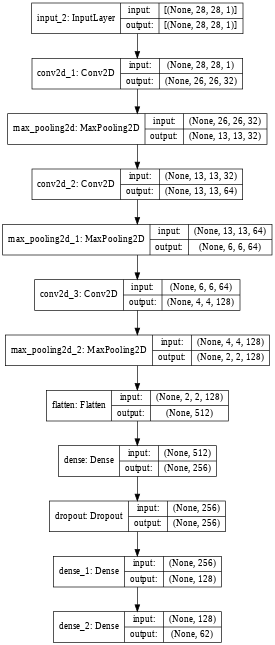

Regularization was used as its an effective way to promote the generalisation perfomance of model

Then I trained the model by adding activity_regularizer=tf.keras.regularizers.L2(0.01)) to the dense layer and also trained a model by adding  actvity_regularizer=tf.keras.regularizers.L1(0.01)  

The model with regularizerL2 performed better than the model with dropout layer and regularizerL1



After Training the model with regularizelL2 for 60 epochs my observation was that the model got overfitted after 40 epochs so I tried increasing the batch size but the results didn't change much so tried tweaking the learning rate to increase the and reducing the parameter by increasing filter size removing a dense layer reducing the no. of channels model's accuracy

Reducing the parameters by increasing the filter size gave an training accuracy of 88% and validation accuracy of 74%




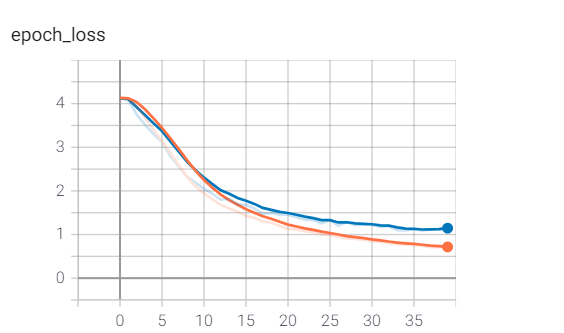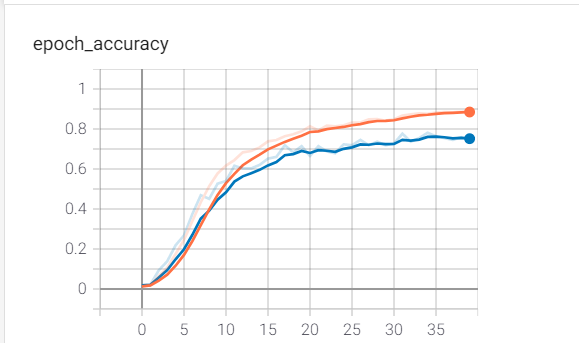


Performed Part 2 on the following model 






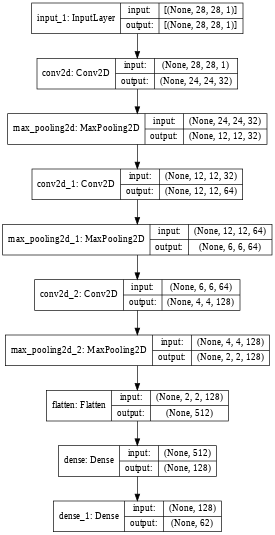

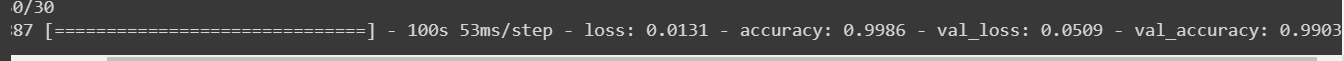

In [ ]:
The accuracy achieved by training pre-trained model MNIST dataset is  training_acc: 99.86% and validation_acc = 99.03% 
While the Training of model randomly initialised schieved a accuracy of training_acc: 99.7% and validation_acc = 98.98%

Pretrained Model Acc and Loss

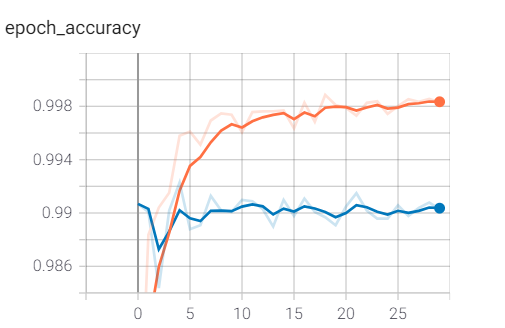


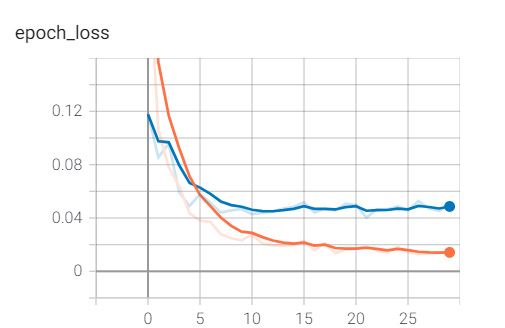

Randomly Intialised Model


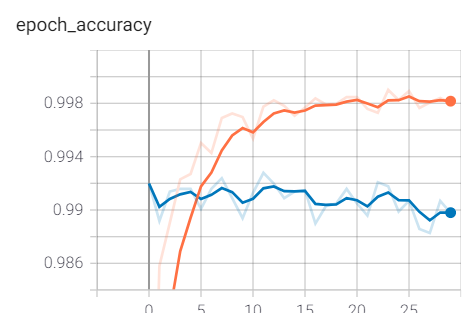



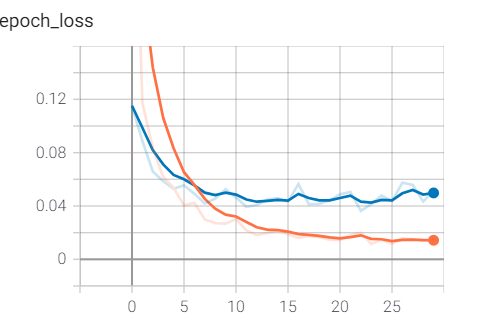

In [ ]:
The pretrained model had a better validation accuracy than the randomly intialised model due to transfer learning
and the randomly intialised model took more training time than pretrained model to achieve almost similar accuracy 

For Task 3

Analysis of dataset




*   The dataset was preprocessed on the pre-trained model obtained from task 2.
*   The dataset is noisly labeled
*   The task 3 is Label Smoothing Regularization
*   Label smoothing prevents overfitting of a model by softening the ground-truth labels in the training data in an attempt to penalize overconfident outputs



